In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#read data, specify index so it's easier to join and search using loc
path = '../../data/new-york-city-airbnb-open-data/'
listings_csv = os.path.join(path,'model_columns_listings.csv')
listings = pd.read_csv(listings_csv)

In [17]:
listings.columns.values

array(['Unnamed: 0', 'id', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_identity_verified', 'latitude',
       'longitude', 'is_location_exact', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'number_of_reviews',
       'number_of_reviews_ltm', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'last_review_days_ago', 'host_verifications_ facebook',
       'host_verifications_ google', 'host_verifications_ government_id',
       'host_verifications_ identity_manual', 'host_verifications_ jumio',
       'host_verifications_ kba', 'host_verifications_ manual_

In [26]:
listings['number_of_reviews'].isna().sum()

0

In [27]:
#filter brooklyn and apt only, and only reviews score more than 70
filt = (listings['property_type_Apartment'] == 1) & (listings['neighbourhood_group_cleansed_Brooklyn'] ==1)

price_review = listings[['price','number_of_reviews']][filt]
price_review_mean = price_review.groupby('number_of_reviews').agg({'price':'mean'}).reset_index()
price_review_mean.head()

number_of_reviews       price
0                  1  106.560902
1                  2  116.597582
2                  3  113.588235
3                  4  114.818182
4                  5  113.301325

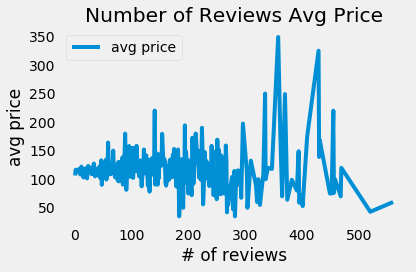

In [32]:
number_of_reviews_x = price_review_mean['number_of_reviews']
price_mean_y = price_review_mean['price']
plt.plot(number_of_reviews_x,price_mean_y, label = 'avg price')

plt.style.use('fivethirtyeight')
plt.title('Number of Reviews Avg Price')
plt.xlabel('# of reviews')
plt.ylabel('avg price')
plt.grid()
plt.tight_layout()
plt.legend()
plt.show()

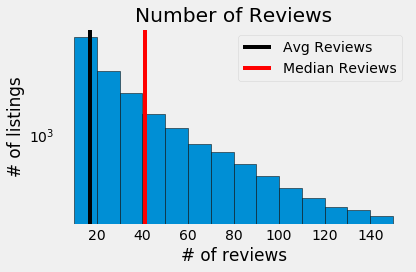

In [55]:
#data is from listings df
number_of_reviews_x = listings['number_of_reviews']
mean_review = listings['number_of_reviews'].mean()
mean_review = listings['number_of_reviews'].median()
bins = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]
plt.hist(number_of_reviews_x, bins=bins, edgecolor='black', log=True)
plt.axvline(mean_review, color='black', label='Avg Reviews')
plt.axvline(median_review, color='red', label='Median Reviews')

plt.style.use('fivethirtyeight')
plt.title('Number of Reviews')
plt.xlabel('# of reviews')
plt.ylabel('# of listings')
plt.grid()
plt.tight_layout()
plt.legend()
plt.show()

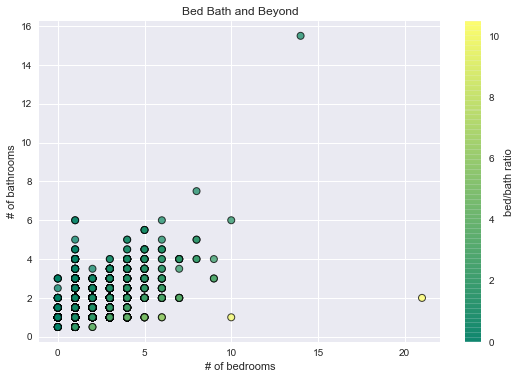

In [67]:
#bedroom/bathroom relationship
bedrooms = listings['bedrooms']
bathrooms = listings['bathrooms']
ratio = listings['bedrooms']/listings['bathrooms']

#style
plt.style.use('seaborn')

#scater plot
plt.scatter(bedrooms,bathrooms, c=ratio, cmap='summer', edgecolor='black', linewidths=1, alpha=0.75)

#set bar on the side
cbar = plt.colorbar()
cbar.set_label('bed/bath ratio')

#all titles etc
plt.title('Bed Bath and Beyond')
plt.xlabel('# of bedrooms')
plt.ylabel('# of bathrooms')


plt.show()
